In [14]:
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_fe_balanced.pkl'))

df = df.dropna()
print(len(df))
df.head()

1173


,id_aluno,faz_licao_casa_2.0,reprovacao_0.0,reprovacao_1.0,pai_sabe_ler_escrever_1.0,leitura_revista_comportamento_0.0,leitura_jornais_0.0,escolaridade_pai_4.0,mae_sabe_ler_escrever_1.0,leitura_internet_2.0,tempo_lazer_1.0,escolaridade_mae_4.0,gosta_estudar_disciplina_0.0,gosta_estudar_disciplina_1.0,desempenho_aluno_cat
38709,17486608,True,False,True,False,False,False,False,False,False,False,False,True,False,0
102980,11168544,True,False,True,False,False,False,False,True,False,True,False,False,True,0
55216,3272843,False,True,False,False,False,False,False,True,True,False,True,False,True,0
57311,12149602,False,False,True,False,False,False,False,True,True,False,True,True,False,0
38264,12094178,False,False,False,False,False,False,False,False,False,True,False,True,False,0


In [15]:
print(df.columns)

Index(['id_aluno', 'faz_licao_casa_2.0', 'reprovacao_0.0', 'reprovacao_1.0',
       'pai_sabe_ler_escrever_1.0', 'leitura_revista_comportamento_0.0',
       'leitura_jornais_0.0', 'escolaridade_pai_4.0',
       'mae_sabe_ler_escrever_1.0', 'leitura_internet_2.0', 'tempo_lazer_1.0',
       'escolaridade_mae_4.0', 'gosta_estudar_disciplina_0.0',
       'gosta_estudar_disciplina_1.0', 'desempenho_aluno_cat'],
      dtype='object')


In [16]:
# distribuição das classes
df['desempenho_aluno_cat'].value_counts(dropna=False)

desempenho_aluno_cat
0    929
1    244
Name: count, dtype: int64

In [17]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno', 'proficiencia']

exclude = [col for col in df.columns if col in exclude]

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

from IPython.display import clear_output

clear_output()

In [19]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

In [20]:
X = X.astype(int)
y = y.astype(int)

In [21]:
res = SMOTE(random_state=42)
X, y = res.fit_resample(X, y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_val.shape, X_test.shape

((1188, 13), (298, 13), (372, 13))

In [26]:
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dense(4, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 4)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, verbose=1, callbacks=[es])

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.3584 - val_accuracy: 0.8557 - val_loss: 0.3292
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8594 - loss: 0.3290 - val_accuracy: 0.8456 - val_loss: 0.3338
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8377 - loss: 0.3540 - val_accuracy: 0.8523 - val_loss: 0.3342
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8337 - loss: 0.3725 - val_accuracy: 0.8523 - val_loss: 0.3193
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8320 - loss: 0.3761 - val_accuracy: 0.8456 - val_loss: 0.3195
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.8364 - loss: 0.3579 - val_accuracy: 0.8490 - val_loss: 0.3235
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8558 - loss: 0.3431 - val_accuracy: 0.8557 - val_loss: 0.3274
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8345 - loss: 0.3745 - val_accuracy

In [29]:
# confusion matrix
y_pred = model.predict(X_test)

y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       187
           1       0.80      0.82      0.81       185

    accuracy                           0.81       372
   macro avg       0.81      0.81      0.81       372
weighted avg       0.81      0.81      0.81       372



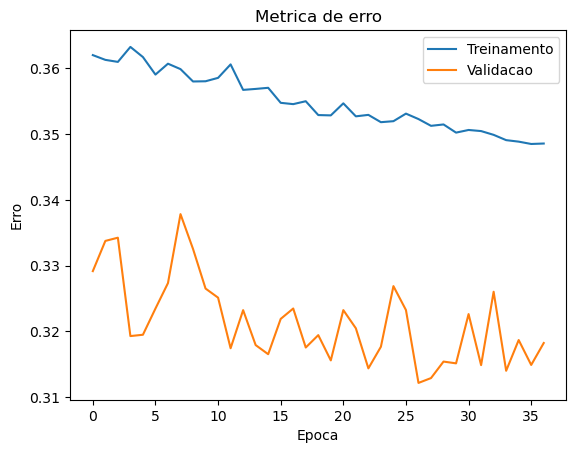

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step

--> Acuracia (treino): 0.8418
--> Acuracia (validacao): 0.8557
--> acc_train - acc_val = -0.0140
--> E_val - E_in = -0.0303


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")